A simple problem demonstrating how **NMFk** can be applied to extract unknown signals is presented below.

This type of analysis is frequently called **blind source separation** or **feature extraction**.

In [13]:
import NMFk

After importing **NMFk**, generate 3 random signals:

In [18]:
a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

15×3 Array{Float64,2}:
 0.169429   0.463725   0.274504 
 0.875464   0.622609   0.803675 
 0.59103    0.991567   0.75759  
 0.82517    0.374725   0.0872999
 0.126242   0.293561   0.504925 
 0.0225502  0.895814   0.44111  
 0.32163    0.446785   0.22847  
 0.0225549  0.418625   0.927488 
 0.0333789  0.0975258  0.200332 
 0.0426165  0.961704   0.675349 
 0.893518   0.7528     0.862933 
 0.996052   0.16221    0.456587 
 0.952751   0.492273   0.415292 
 0.606605   0.415546   0.715375 
 0.348393   0.15881    0.809203 

Collect the signal vectors into a signal matrix `W`:

In [19]:
W = [a b c]

15×3 Array{Float64,2}:
 0.169429   0.463725   0.274504 
 0.875464   0.622609   0.803675 
 0.59103    0.991567   0.75759  
 0.82517    0.374725   0.0872999
 0.126242   0.293561   0.504925 
 0.0225502  0.895814   0.44111  
 0.32163    0.446785   0.22847  
 0.0225549  0.418625   0.927488 
 0.0333789  0.0975258  0.200332 
 0.0426165  0.961704   0.675349 
 0.893518   0.7528     0.862933 
 0.996052   0.16221    0.456587 
 0.952751   0.492273   0.415292 
 0.606605   0.415546   0.715375 
 0.348393   0.15881    0.809203 

Mix the signals to produce a data matrix `X` representing data collected at 5 sensors. Each sensor is observing some  mixture of the signals in `W`:

In [20]:
X = [a+c*3 a*10+b b b*5+c a+b*2+c*5]

15×5 Array{Float64,2}:
 0.99294    2.15801   0.463725   2.59313   2.4694 
 3.28649    9.37725   0.622609   3.91672   6.13906
 2.8638     6.90186   0.991567   5.71543   6.36212
 1.08707    8.62643   0.374725   1.96093   2.01112
 1.64102    1.55598   0.293561   1.97273   3.23799
 1.34588    1.12132   0.895814   4.92018   4.01973
 1.00704    3.66309   0.446785   2.4624    2.35755
 2.80502    0.644174  0.418625   3.02061   5.49725
 0.634375   0.431315  0.0975258  0.687961  1.23009
 2.06866    1.38787   0.961704   5.48387   5.34277
 3.48232    9.68798   0.7528     4.62693   6.71378
 2.36581   10.1227    0.16221    1.26764   3.6034 
 2.19863   10.0198    0.492273   2.87666   4.01376
 2.75273    6.4816    0.415546   2.79311   5.01457
 2.776      3.64274   0.15881    1.60325   4.71203

This operation above is equivalent to generating a mixing matrix `H` and obtaining `X` by multiplying `W` and `H`:

In [21]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Array{Int64,2}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

In [7]:
X = W * H

15×5 Array{Float64,2}:
 2.08055    8.72959  0.873729   4.8003   4.69132
 3.43126   10.4549   0.624666   3.93941  6.31274
 3.39306    8.78477  0.0879306  1.28078  5.25118
 2.7423     2.68573  0.76963    4.69838  5.98202
 1.35068    4.20173  0.660489   3.63463  3.33602
 3.16123    8.39385  0.138897   1.47306  4.99617
 3.45847    9.65291  0.288571   2.28353  5.71696
 2.1414     8.05227  0.906301   5.00711  4.9052 
 1.41462    4.52389  0.622364   3.45331  3.34232
 1.74166    7.70226  0.492038   2.8004   3.40616
 2.7766     6.9904   0.191905   1.65844  4.55825
 2.8892     9.65555  0.213464   1.71565  4.61279
 0.701139   1.68046  0.869263   4.55299  2.85301
 1.15865    7.45777  0.90527    4.69415  3.30479
 2.73865    1.5262   0.96528    5.72059  6.45758

Now, we can execute **NMFk** to automatically discover  the number of the unknown mixed signals in `X` and estimate the shape of the unknown mixed signals.
This done based only on the information in `X`:

In [22]:
We, He, fitquality, robustness, aic, kopt = NMFk.execute(X, 2:5; save=false, method=:simple);


OF: min 13.480380280711733 max 13.484417234348443 mean 13.483204304190519 std 0.0015188122327061053
Worst correlation by columns: 0.14691095709808014
Worst correlation by rows: 0.0526428219059897
Worst norm by columns: 0.054678774055546865
Worst norm by rows: 0.07144630336945282
Signals:  2 Fit:     13.48038 Silhouette:    0.9910003 AIC:    -48.71896

OF: min 4.644979635269404e-9 max 0.0002053450089645925 mean 4.097100647365931e-5 std 6.804635616588565e-5
Worst correlation by columns: 0.171386628182514
Worst correlation by rows: 0.08278819254860519
Worst norm by columns: 1.3264666234532025e-6
Worst norm by rows: 1.1677564084078749e-6
Signals:  3 Fit: 4.64498e-09 Silhouette:    0.9059325 AIC:    -1642.873

OF: min 5.564621874165746e-12 max 0.0005798567622327158 mean 7.173506461512692e-5 std 0.00017983167739203798
Worst correlation by columns: 0.1713866585881854
Worst correlation by rows: 0.08278807042304863
Worst norm by columns: 3.615366852565356e-8
Worst norm by rows: 4.7806571897374

┌ Info: Results
└ @ NMFk /Users/monty/.julia/dev/NMFk/src/NMFkExecute.jl:19
┌ Info: Optimal solution: 3 signals
└ @ NMFk /Users/monty/.julia/dev/NMFk/src/NMFkExecute.jl:25


**NMFk** returns the estimated optimal number of signals `kopt` which in this case, as expected, is equal to 3.

**NMFk** also returns estimates of matrices `W` and `H`.
It can be easily verified that `We[kopt]` and `He[kopt]` are scaled versions of the original `W` and `H` matrices:

In [23]:
We[kopt]

15×3 Array{Float64,2}:
  2.30957   2.04429    4.32334 
 11.7525    7.03125    4.55841 
  7.988     6.06109    8.78569 
 11.2157    0.0142805  2.8303  
  1.63011   4.72321    2.34796 
  0.361721  3.13116    8.81005 
  4.37816   1.54033    4.01837 
  0.138084  8.94316    3.30444 
  0.416964  1.91024    0.754062
  0.583267  5.44863    9.21297 
 12.0063    7.43079    5.82672 
 13.3874    4.12645    0.007898
 12.8771    3.18366    3.54037 
  8.0976    6.54195    2.81799 
  4.52824   8.01829    0.346307

In [24]:
He[kopt]

3×5 Array{Float64,2}:
 0.0854358  0.747285   0.0087819  0.0477728  0.110724
 0.296059   0.0285494  0.0106334  0.151254   0.513504
 0.0440375  0.0864484  0.0975414  0.502756   0.269217

Note that the order of columns ('signals') in `W` and `We[kopt]` are not expected to match.
Also note that the order of rows ('sensors') in `H` and `He[kopt]` are also not expected to match.
The estimated orders of 'signals' and 'sensors' will be different every time the code is executed.

**Mads** can be applied to visualize the **NMFk** inputs and outputs:

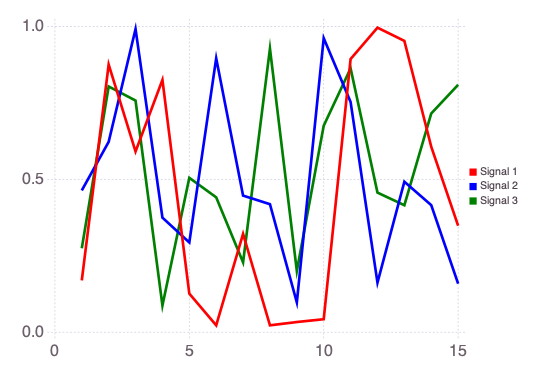

In [26]:
import Mads
Mads.plotseries([a b c])

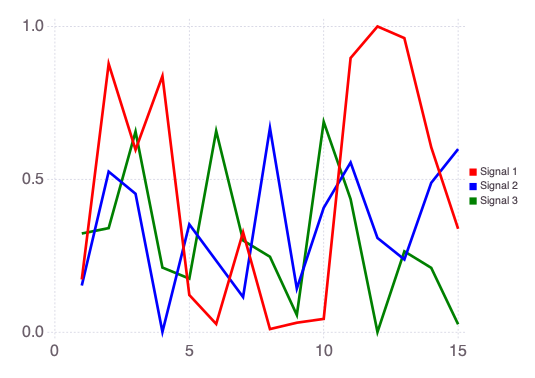

In [27]:
Mads.plotseries(We[kopt] ./ maximum(We[kopt]))

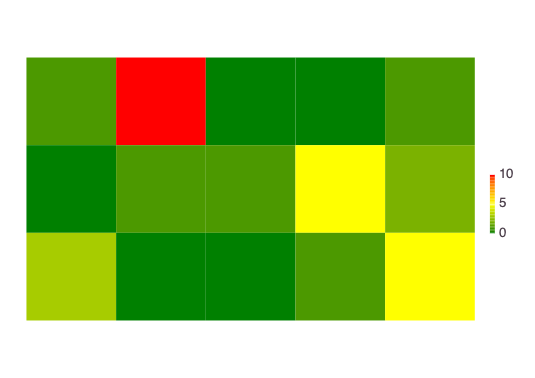

In [28]:
display(NMFk.plotmatrix(H))

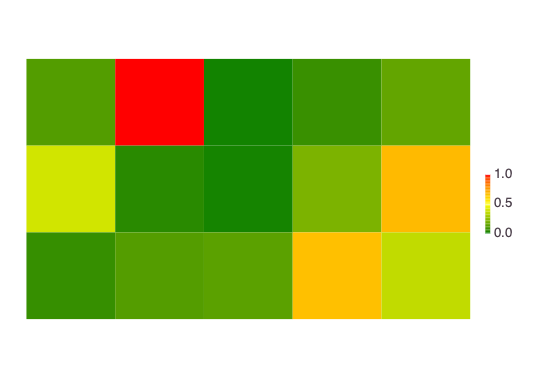

In [29]:
display(NMFk.plotmatrix(He[kopt] ./ maximum(He[kopt])))